# ECS7024P Statistics for Artificial Intelligence and Data Science - Coursework 2

## Table of Contents

- Section 1 - The Dataset
  - A. Source of datset and variables
  - B. Loading dataframe and assigning data types
- Section 2 - Data Preparation
  - A. Age Variable
  - B. Merge Categories
  - C. Current Condition Variable
  - D. Reviewing Outliers
- Section 3 - Exploratory Analysis
  - A. Continuous variables (scatter plots and correlation heatmap)
  - B. Categorical variables (box plots, KDEs and crosstab)
  - C. Continuous and Categorical predictors (KDEs)
  - D. Preliminary conclusions
- Section 4 - Regression Modeling
  - A. Linear regression model (R² and intercept)
  - B. Predictors impact
  - C. Distribution of Residuals (errors)
  - D. Model Accuracy
  - E. Final conclusions

## Section 1: The Dataset

The dataset looks at Bridges in Texas, a simplified version taken from the [US National Bridge Inspection](https://www.fhwa.dot.gov/bridge/nbi/ascii.cfm) maintained by the Federal Highways Agency (FHWA) which is part of the US Department of Transportation.

The Bridge Inspection programme checks the state of the bridges to identify which need the necessary repairs to avoid bridge failures. The dataset includes information about the bridges and the condition given in the most recent inspection.

All bridges include a highway (road running over the bridge) with varying structures underneath such as: roads, waterways or railways.

### Section 1.1 Variables

#### 1.1.1 All Variables

| Variable      |      Description             | Type |
|:--------------|:-----------------------------|:------:|
|Structure_id   | Unique identifier of the bridge                  | String |
|Year           | The year the bridge was built                             | Continuous |
|AverageDaily   | The average daily traffic (number of vehicles)            | Continuous |
|Trucks_percent | The percent of traffic made up of 'trucks' (i.e. lorries) | Continuous |
|Current_Condition  | Overall condition of the bridge based on component ratings (score)   | Continuous |
|Historic       | Whether the bridge is historic                            | Category |
|Material       | The dominant material the bridge is made from             | Category |
|Design         | The design of the bridge                                  | Category |
|Deck_rating    | The condition of the bridge deck              | Ordinal |
|Superstr_rating| The condition of the bridge superstructure                | Ordinal |
|Substr_rating  | The condition of the bridge substructure (foundations)    | Ordinal |

#### 1.1.2 Values of Categorical Variables

| Variable      |      Values            |
|:--------------|:-----------------------|
|Historic       | Register, Possible, Unknown, Not historic |
|Material       | Other, Concrete, Steel, Timber, Masonry |
|Design         | Other, Slab, Beam, Frame, Truss, Arch, Suspension, Movable, Tunnel, Culvert, Mixed |
|Deck_rating    | *Rating*: NA, Excellent, Very Good, Good, Satisfactory, Fair, Poor, Serious, Critical, Failing, Failed |
|Superstr_rating| *Rating* |
|Substr_rating  | *Rating* |
    

### Section 1.2 Import Pandas and Load the Data Frame

We assign data types and order categorical ratings to ensure accurate and efficient data handling.

In [2]:
import pandas as pd

df = pd.read_csv('tx19_bridges_sample.csv')

#defines the categorical rating types
rating_type = pd.CategoricalDtype(categories=['Failed','Failing','Critical','Serious','Poor','Fair',
                                'Satisfactory','Good','Very Good','Excellent','NA'], ordered=True)

#defines column types
types_dict = {'Structure_id':str, 'Year':'int', 'Age':'int','AverageDaily':'float',
              'Trucks_percent':'float', 'Material':'category','Design':'category',
              'Deck_rating':rating_type,'Superstr_rating':rating_type,
              'Substr_rating':rating_type,'Historic':'category',}

#re-defines dataset with index as structure_id and assigning the types to variables
bridges = pd.read_csv('tx19_bridges_sample.csv', dtype=types_dict, index_col='Structure_id')

bridges

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1.0,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1.0,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100.0,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80.0,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150.0,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300.0,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300.0,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200.0,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500


## Section 2: Data Preparation

### Section 2.1: Age Variable

The 'Age' variable is created to explore potential age-related deterioration in bridges, assuming that subtracting the construction year from the current year (2024) provides an accurate estimate of bridge age.

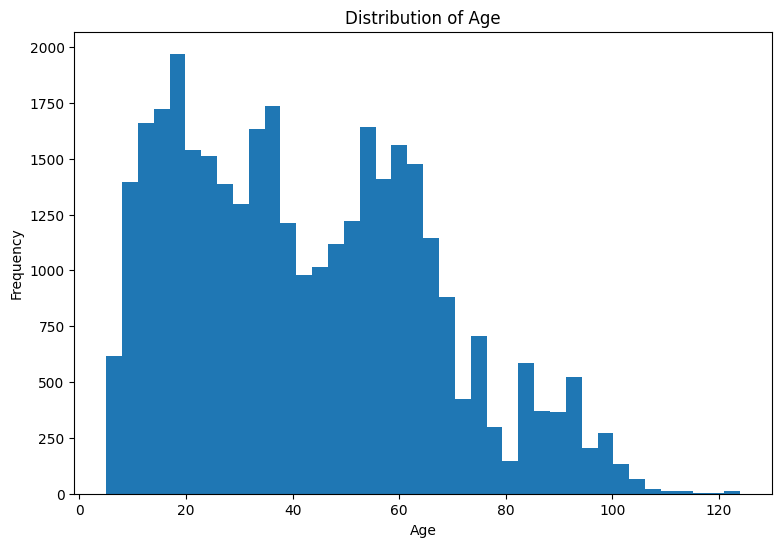

In [3]:
import matplotlib.pyplot as plt

#creates age variable
bridges['Age'] = 2024-bridges['Year']

#plot age distribution
plt.figure(figsize=(9,6))
plt.hist(bridges['Age'], bins=40)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show;

The age distribution shows the majority of bridges to be under 80 years, with very few older ones. We exclude the bridges registered as historic along with those over 80 to focus on typical bridge aging patterns, avoiding any outliers.

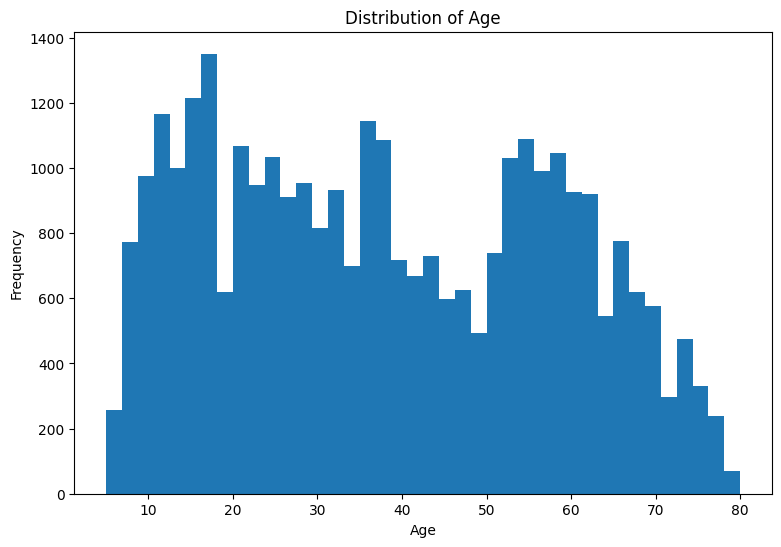

In [4]:
#excludes registered historic bridges
bridges = bridges[(bridges['Historic'] == 'Not historic') | (bridges['Historic'] == 'Unknown') | (bridges['Historic'] == 'Possible')]

#excludes bridges above 80 years
bridges = bridges[bridges['Age'] <= 80]

plt.figure(figsize=(9,6))
plt.hist(bridges['Age'], bins=40)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show;

### Section 2.2: Merge Categories

We assess bridge material and design distributions to identify and merge categories with low frequencies, simplifying the analysis and to avoid skewed representation from less common material or designs.

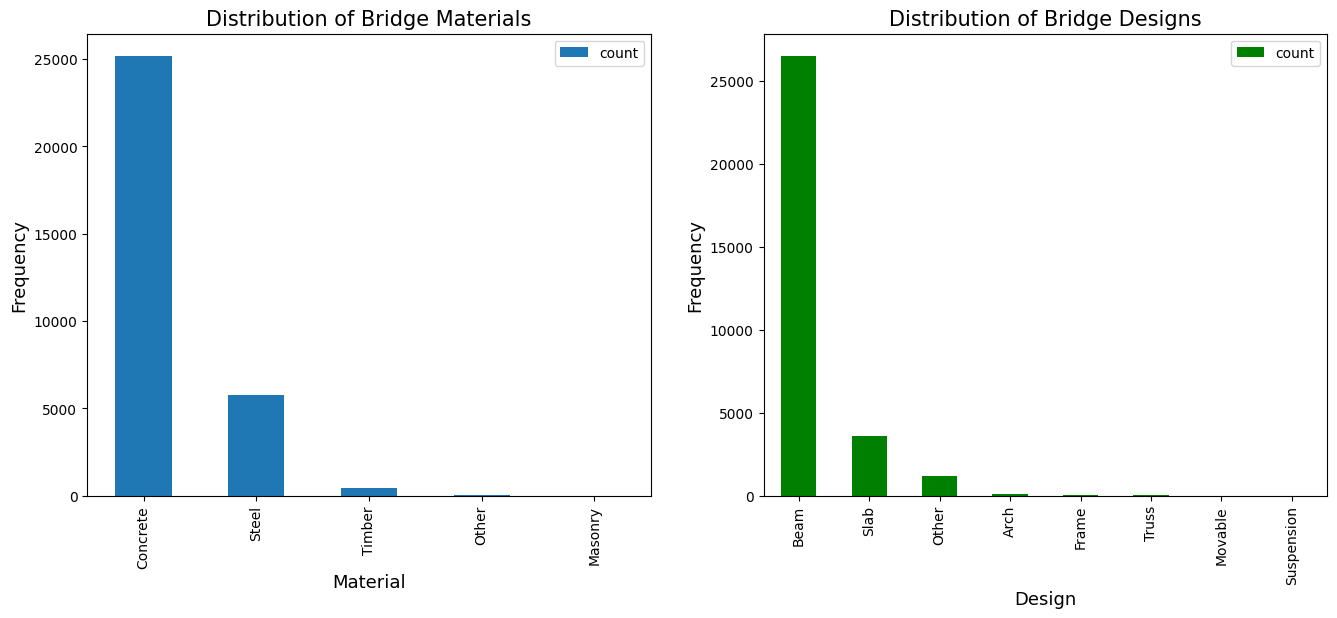

In [5]:
#plots distributions
fig, axes = plt.subplots(1, 2, figsize=(16,6))

bridges['Material'].value_counts().plot(kind='bar', ax=axes[0], width=0.5)
axes[0].set_title('Distribution of Bridge Materials', size=15)
axes[0].set_xlabel('Material', size=13)
axes[0].set_ylabel('Frequency', size=13)
axes[0].legend()

bridges['Design'].value_counts().plot(kind='bar',ax=axes[1], color='green', width=0.5)
axes[1].set_title('Distribution of Bridge Designs', size=15)
axes[1].set_xlabel('Design', size=13)
axes[1].set_ylabel('Frequency', size=13)
axes[1].legend()

plt.show();

We merge the low frequency categories shown in the distributions to focus the most common materials (Concrete and Steel) and design types (Beam and Slab), which represent the majority of bridges.

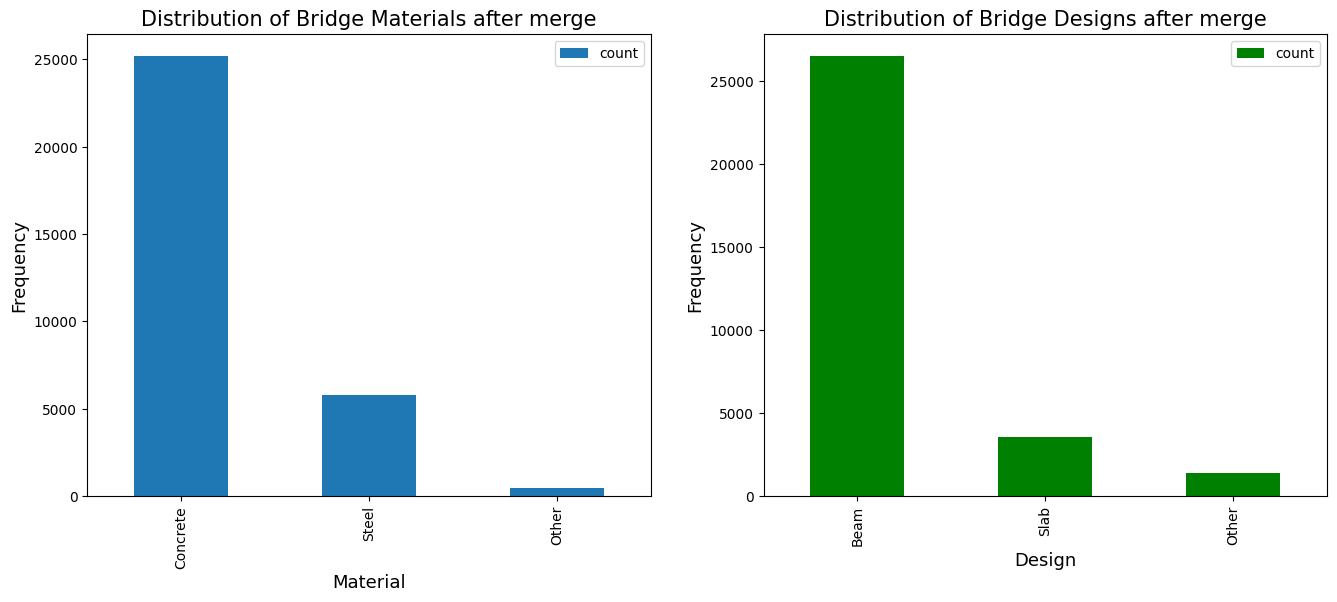

In [6]:
#defines categories to group smaller categories to other
map_m = {'Timber':'Other', 'Masonry':'Other'}
map_d = {'Arch':'Other', 'Frame':'Other','Truss':'Other','Movable':'Other','Suspension':'Other'}

#map to columns, using fillna to keep existing values for categories not in map
bridges['Material'] = bridges['Material'].map(map_m).fillna(bridges['Material']).astype('category')
bridges['Design'] = bridges['Design'].map(map_d).fillna(bridges['Design']).astype('category')

#plots distributions
fig, axes = plt.subplots(1, 2, figsize=(16,6))

bridges['Material'].value_counts().plot(kind='bar', ax=axes[0], width=0.5)
axes[0].set_title('Distribution of Bridge Materials after merge', size=15)
axes[0].set_xlabel('Material', size=13)
axes[0].set_ylabel('Frequency', size=13)
axes[0].legend()

bridges['Design'].value_counts().plot(kind='bar',ax=axes[1], color='green', width=0.5)
axes[1].set_title('Distribution of Bridge Designs after merge', size=15)
axes[1].set_xlabel('Design', size=13)
axes[1].set_ylabel('Frequency', size=13)
axes[1].legend()

plt.show();

### Section 2.3: Current Condition Variable

We create a 'Current Condition' score (target variable) that combines Deck, Superstructure and Substructure ratings into a single, continuous measure. This provides a unified measure needed for accurate regression modeling.

In [7]:
#maps ratings to numeric scores
rating_score = {'Failed':0,'Failing':1,'Critical':2,'Serious':3,'Poor':4,'Fair':5,
                'Satisfactory':6,'Good':7,'Very Good':8,'Excellent':9,'NA':None}

#maps each score to the rating variables
bridges['Deck_score'] = bridges['Deck_rating'].map(rating_score)
bridges['Superstr_score'] = bridges['Superstr_rating'].map(rating_score)
bridges['Substr_score'] = bridges['Substr_rating'].map(rating_score)

#creates new variable current_condition by summing the 3 scores
bridges['Current_Condition'] = bridges[['Deck_score','Superstr_score','Substr_score']].sum(axis=1)

#display first few rows
bridges[['Deck_rating','Superstr_rating','Substr_rating','Current_Condition']].head()

,Deck_rating,Superstr_rating,Substr_rating,Current_Condition
Structure_id,,,,
000021521-00101,Good,Very Good,Very Good,23.0
000021521-00181,Good,Good,Very Good,22.0
000021521-TMP20,Very Good,Very Good,Very Good,24.0
000021525-00012,Good,Good,Poor,18.0
000021580-00092,Good,Very Good,Very Good,23.0


### Section 2.4: Reviewing Outliers

We use boxplots to identify outliers within the continuous variables as high or low values may skew the analysis.

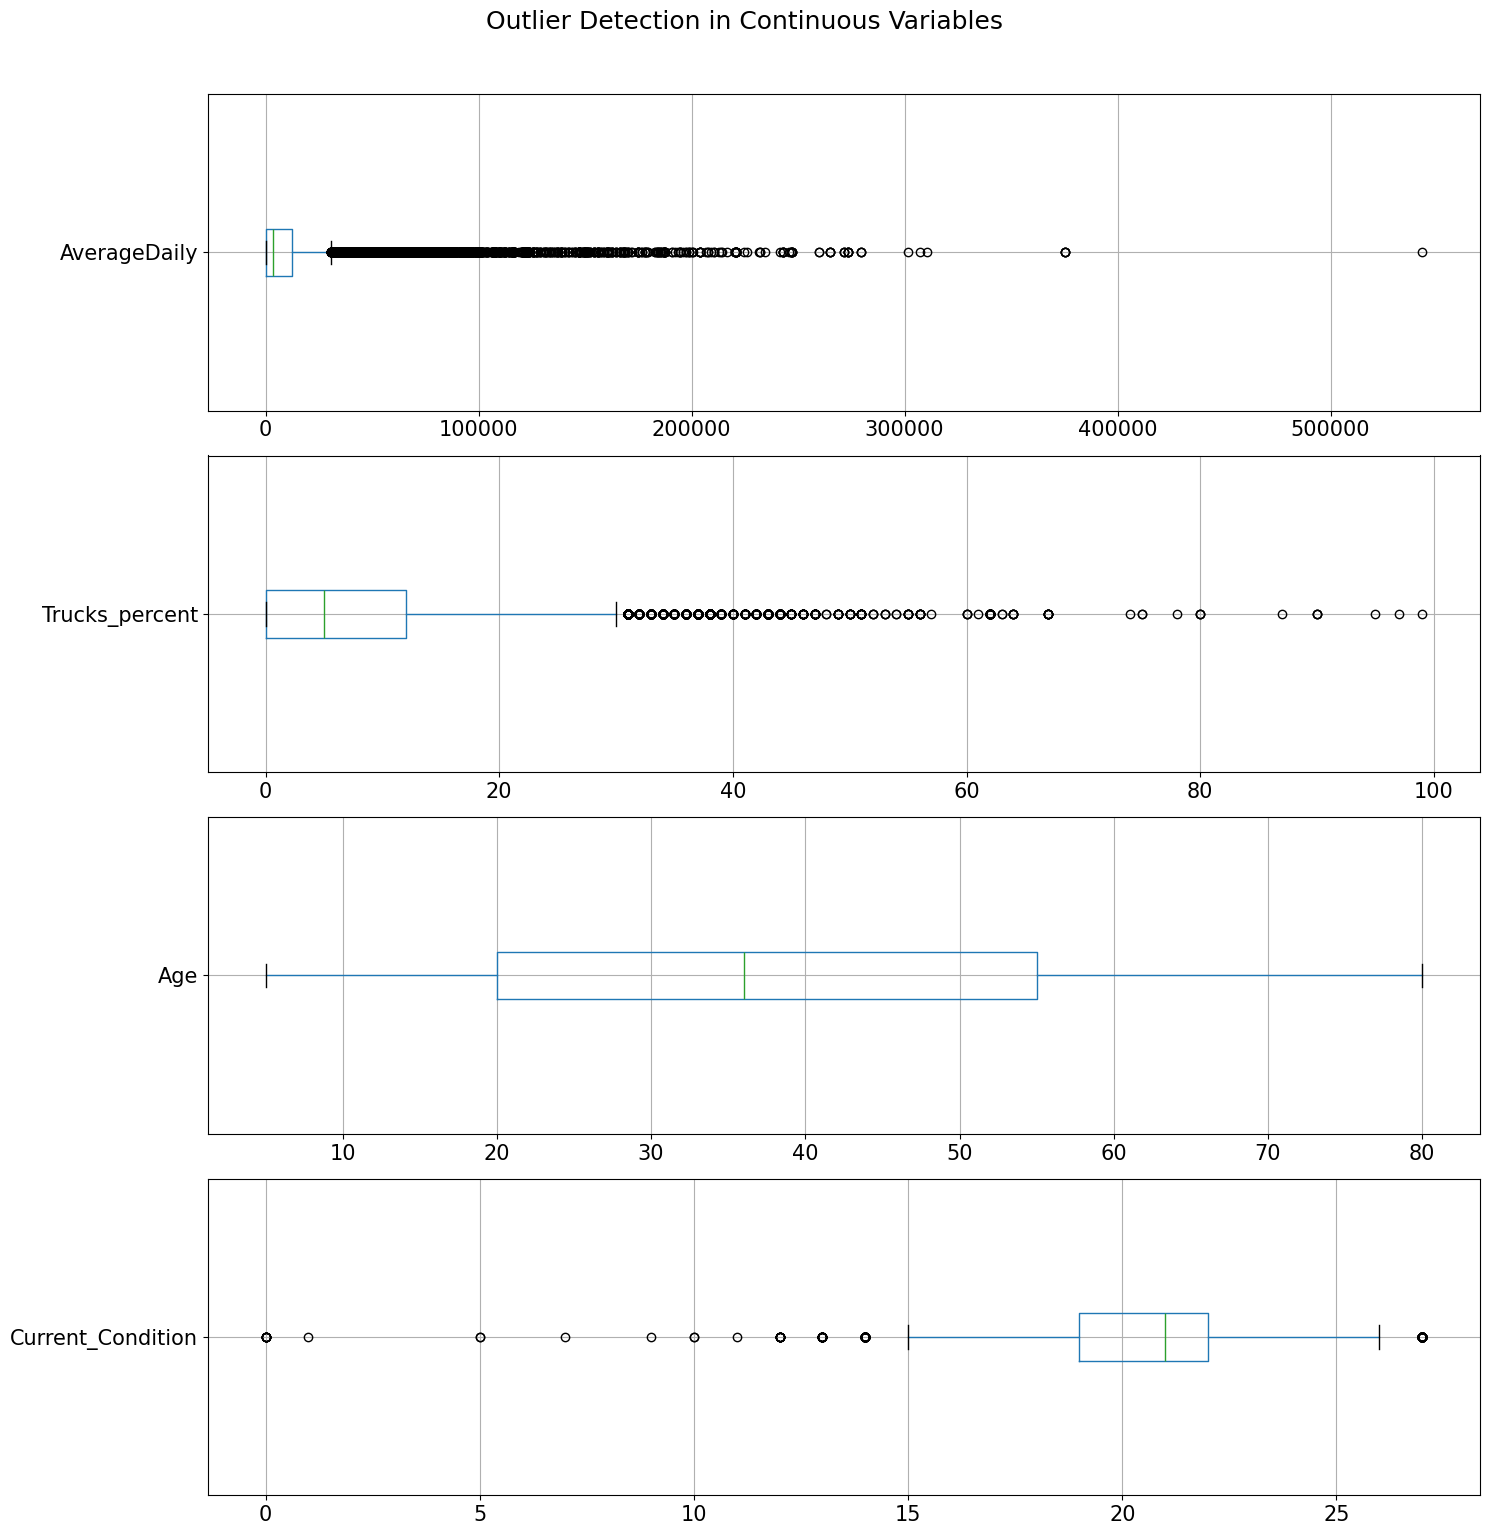

In [8]:
import numpy as np

fig, (a1, a2, a3, a4) = plt.subplots(4,1, figsize=(15,15))

#plots distributions
bridges.boxplot(column='AverageDaily', ax=a1, vert=False)
bridges.boxplot(column='Trucks_percent', ax=a2, vert=False)
bridges.boxplot(column='Age', ax=a3, vert=False)
bridges.boxplot(column='Current_Condition', ax=a4, vert=False)

for ax in [a1, a2, a3, a4]:
    ax.tick_params(axis='x',labelsize=15)
    ax.tick_params(axis='y',labelsize=15)

fig.suptitle('Outlier Detection in Continuous Variables', size=18, y=1.02)
plt.tight_layout();


The boxplot distributions revealed that Average Daily Traffic values above 200,000 are likely extreme outliers. We filter these and focus on more typical traffic levels.

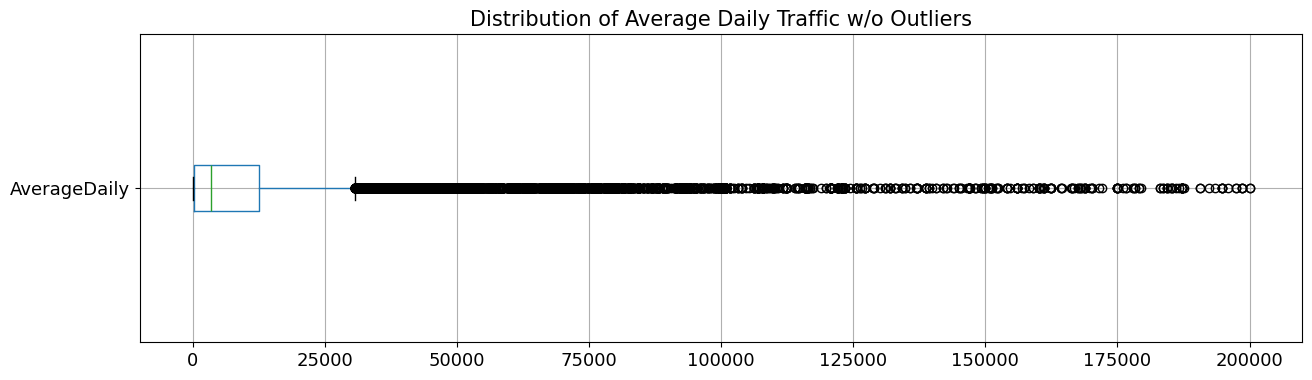

In [9]:
bridges = bridges[bridges['AverageDaily'] <= 200000]

plt.figure(figsize=(15,4))
plt.title('Distribution of Average Daily Traffic w/o Outliers', size=15)
bridges.boxplot(column='AverageDaily', vert=False)
plt.xticks(size=13)
plt.yticks(size=13);

## Section 3: Exploratory Analysis

This section examines the relationship between the predictor variables and target variable (defined below), using appropriate methods for continuous and categorical data. Identifying correlations helps reveal which factors are most likely to affect bridge wear, useful for priortising maintenance needs. Preliminary findings will address these factors influencing bridge durability.

| Predictor Variables | Type        |
|:--------------------|:------------|
|Age                  | Continuous  |
|AverageDaily         | Continuous  |
|Trucks_percent       | Continuous  |
|Material             | Categorical |
|Design               | Categorical |

| Target Variable     | Type        |
|:--------------------|:------------|
|Current_Condition    | Continuous  |



### 3.1 Continuous Variables

This section uses scatter plots and a heatmap to visualise and quantify any correlations between the continuous predictors (AverageDaily, Age and Trucks_percent) and the target variable (Current_Condition), as well as between the continuous predictors themselves. These visuals give insights into how each predictor may influence bridge durability.

#### 3.1.1 Scatter plots

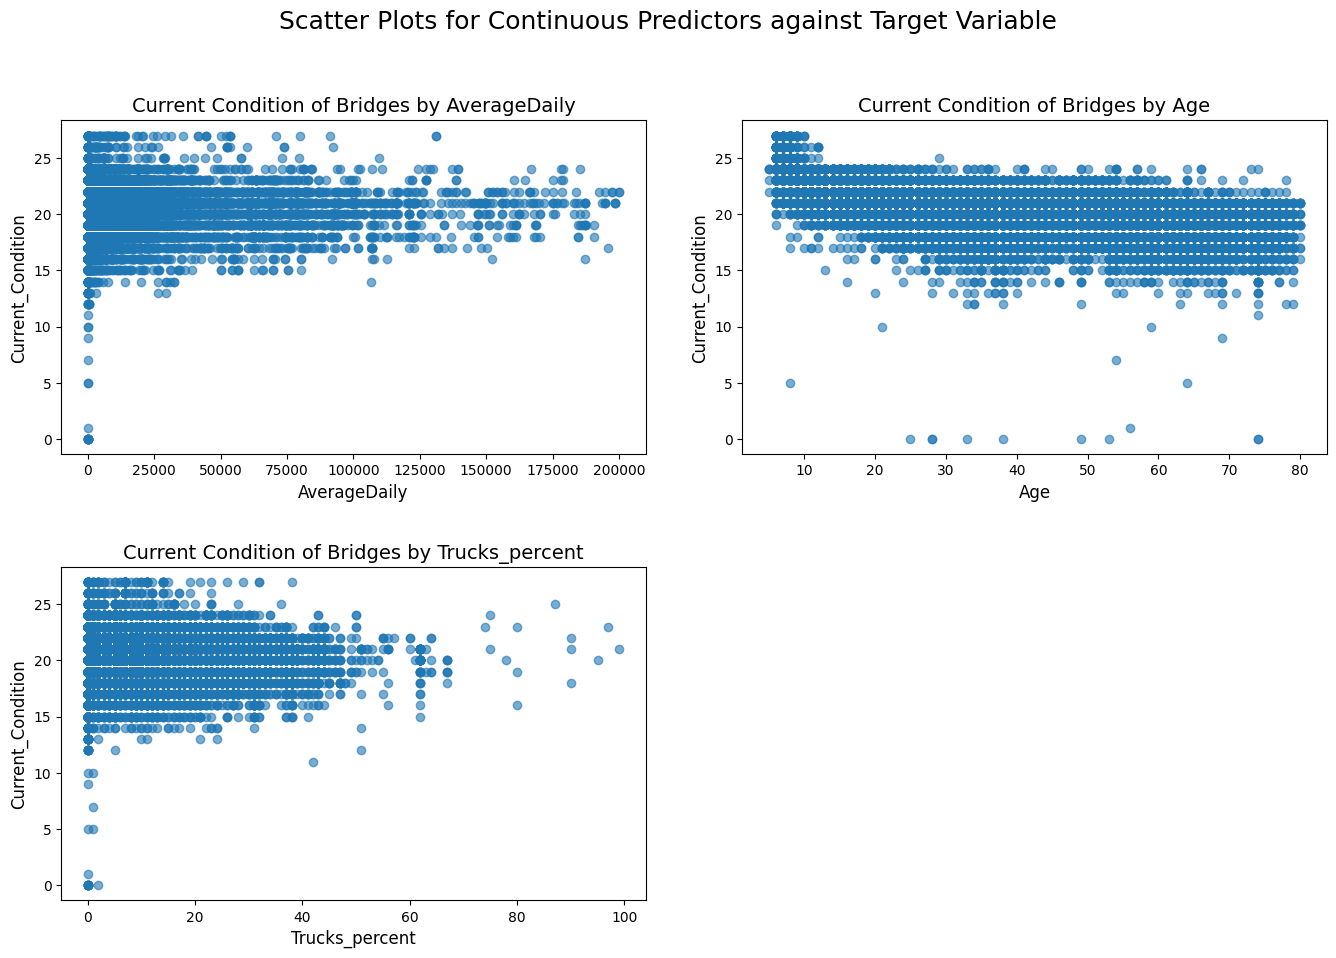

In [10]:
continuous_predictors = ['AverageDaily', 'Age', 'Trucks_percent']
target = 'Current_Condition'

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14,10))
axes=axes.flatten()

for i, predictor in enumerate(continuous_predictors):
    axes[i].scatter(bridges[predictor], bridges[target], alpha=0.6)
    axes[i].set_title(f'Current Condition of Bridges by {predictor}', fontsize=14)
    axes[i].set_xlabel(predictor, fontsize=12)
    axes[i].set_ylabel(target, fontsize=12)

axes[-1].axis('off')

fig.suptitle('Scatter Plots for Continuous Predictors against Target Variable', fontsize=18)
plt.tight_layout(pad=3.0)
plt.show()

- Average Daily Traffic: no clear relationship with bridge condition which suggests it has limited predictive value alone.
- Bridge Age: bridge condition slightly declines with age, suggesting the older the bridge the worse the condition.
- Percentage of Trucks: higher percentage of trucks show a slight decrease in bridge condition, indicating possible wear from heavy loads.

#### 3.1.2 Correlation Heatmap

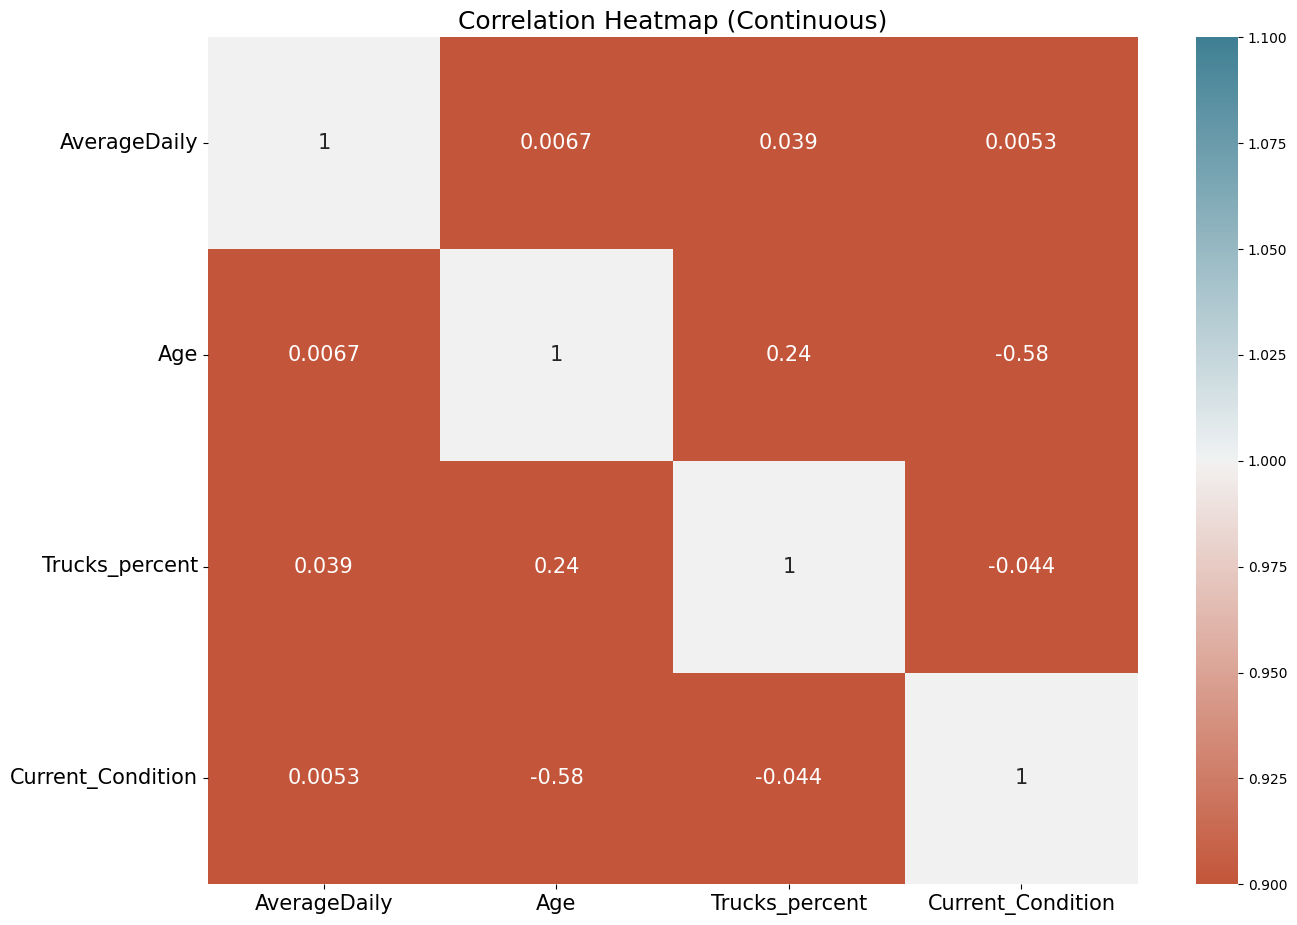

In [11]:
import seaborn as sns

continuous_predictors = ['AverageDaily', 'Age', 'Trucks_percent']
target = 'Current_Condition'

fig,ax = plt.subplots(1,1, figsize=(15,11))
sns.heatmap(bridges[continuous_predictors + [target]].corr(), vmin=1, vmax=1,
            cmap=sns.diverging_palette(20,220,as_cmap=True), annot=True, ax=ax, annot_kws={'size':15})

plt.title("Correlation Heatmap (Continuous)", fontsize=18)
y = plt.yticks(rotation=0, fontsize=15)
x = plt.xticks(rotation=0, fontsize=15)

- Average Daily Traffic: the low correlation value (0.0053) further confirms that daily traffic alone likely has minimal impact on bridge condition, as seen in the scatter plot.
- Bridge Age: displays a moderate negative correlation (-0.58) with bridge condition, reinforcing age as a key factor negatively affecting bridge durability.
- Percentage of Trucks: displays a weak negative correlation (-0.044) with bridge condition, indicating that truck traffic may contribute slightly to bridge wear but is likley more meaningful considered along with other predcitors.

Among the continiuous predictors, bridge age and the percentage of trucks show a meaningful positive correlation (0.24), indicating that older bridges tend to experience higher truck traffic which highlights the importance of analysing these factors together further in the study.

### 3.2 Categorical Variables

This section uses box plots and KDEs to examine how categorical predictors (Material and Design) relate to bridge condition by visualizing distribution and density within each category. These methods reveal differences in bridge condition that categorical data alone can’t convey. Additionally, cross-tabulation is used to compare categorical variables directly which provides meaningful counts to support further analysis of categorical relationships.

#### 3.2.1 Box Plots and KDEs

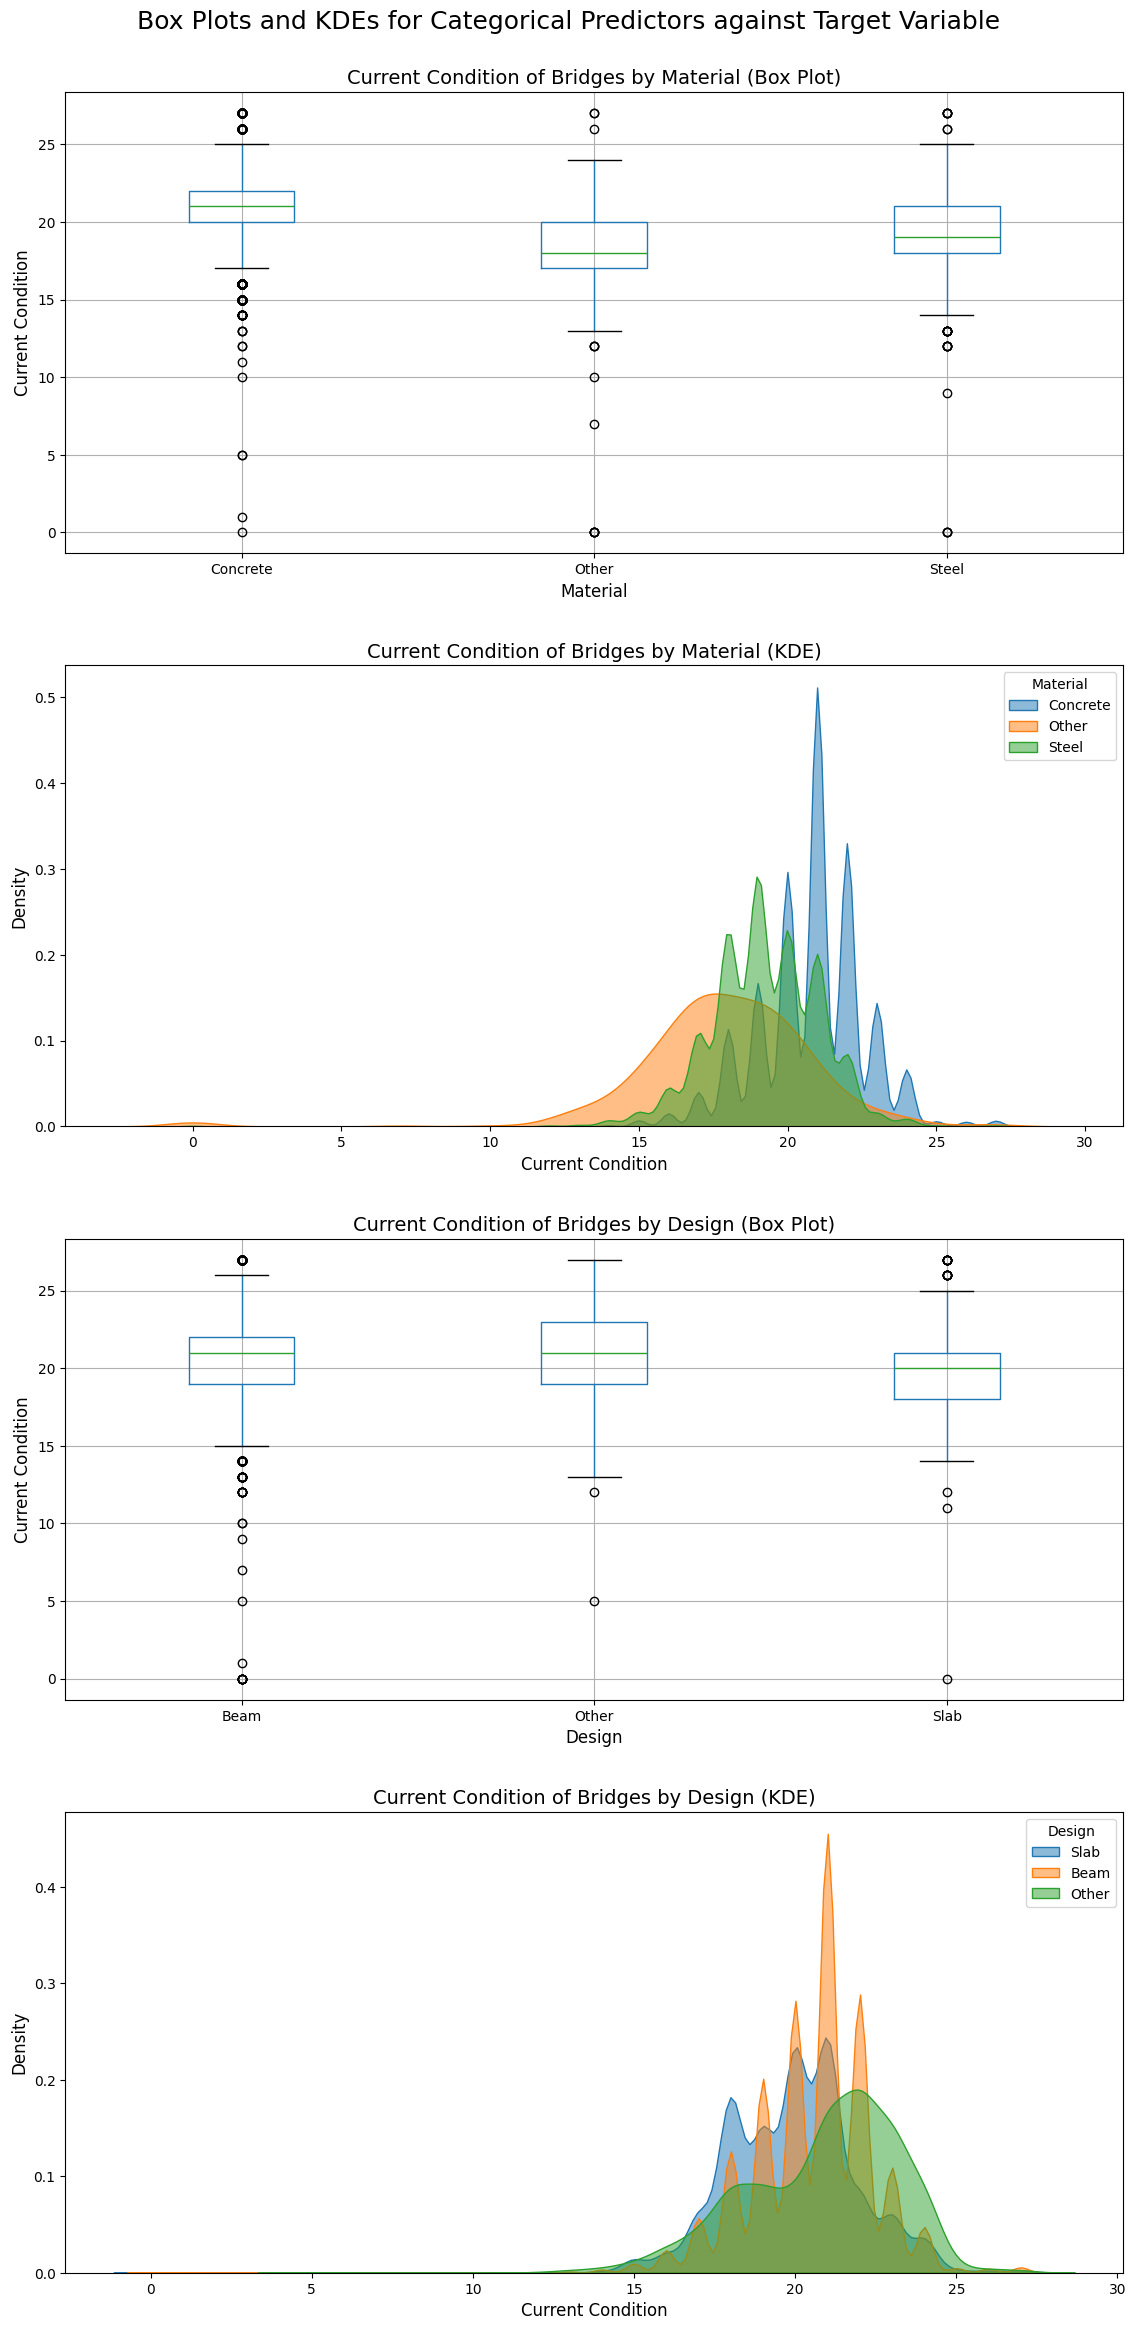

In [12]:
fig, (a1, a2, a3, a4) = plt.subplots(4, 1, figsize=(12, 24))

# Box plot for Current_Condition by Material
bridges.boxplot(column='Current_Condition', by='Material', ax=a1)
a1.set_xlabel('Material', fontsize=12)
a1.set_ylabel('Current Condition', fontsize=12)
a1.set_title('Current Condition of Bridges by Material (Box Plot)', fontsize=14)

# KDE plot for Current_Condition by Material
for material_type in bridges['Material'].unique():
    subset = bridges[bridges['Material'] == material_type]
    sns.kdeplot(subset['Current_Condition'], label=material_type, ax=a2, fill=True, alpha=0.5)
a2.set_xlabel('Current Condition', fontsize=12)
a2.set_ylabel('Density', fontsize=12)
a2.set_title('Current Condition of Bridges by Material (KDE)', fontsize=14)
a2.legend(title='Material')

# Box plot for Current_Condition by Design
bridges.boxplot(column='Current_Condition', by='Design', ax=a3)
a3.set_xlabel('Design', fontsize=12)
a3.set_ylabel('Current Condition', fontsize=12)
a3.set_title('Current Condition of Bridges by Design (Box Plot)', fontsize=14)

# KDE plot for Current_Condition by Design
for design_type in bridges['Design'].unique():
    subset = bridges[bridges['Design'] == design_type]
    sns.kdeplot(subset['Current_Condition'], label=design_type, ax=a4, fill=True, alpha=0.5)
a4.set_xlabel('Current Condition', fontsize=12)
a4.set_ylabel('Density', fontsize=12)
a4.set_title('Current Condition of Bridges by Design (KDE)', fontsize=14)
a4.legend(title='Design')

fig.suptitle('Box Plots and KDEs for Categorical Predictors against Target Variable', fontsize=18)
plt.tight_layout(pad=3.0)

plt.show()


- Material: Concrete and steel bridges have similar average condition scores, but concrete shows a wider range and more outliers, suggesting it may wear down more unevenly. The density plot supports this, with concrete bridges peaking at slightly lower condition scores than steel, hinting that concrete may be more susceptible to deterioration.
  
- Design: Beam bridges display a wider range of conditions and more extreme outliers, suggesting they might be more vulnerable in certain scenarios. The density plot backs this up, showing that Beam designs tend to cluster at higher condition levels, while Slab designs spread across a broader range, indicating their durability may depend on other factors like age or traffic load.

#### 3.2.2 Conditional Probability Cross Tab

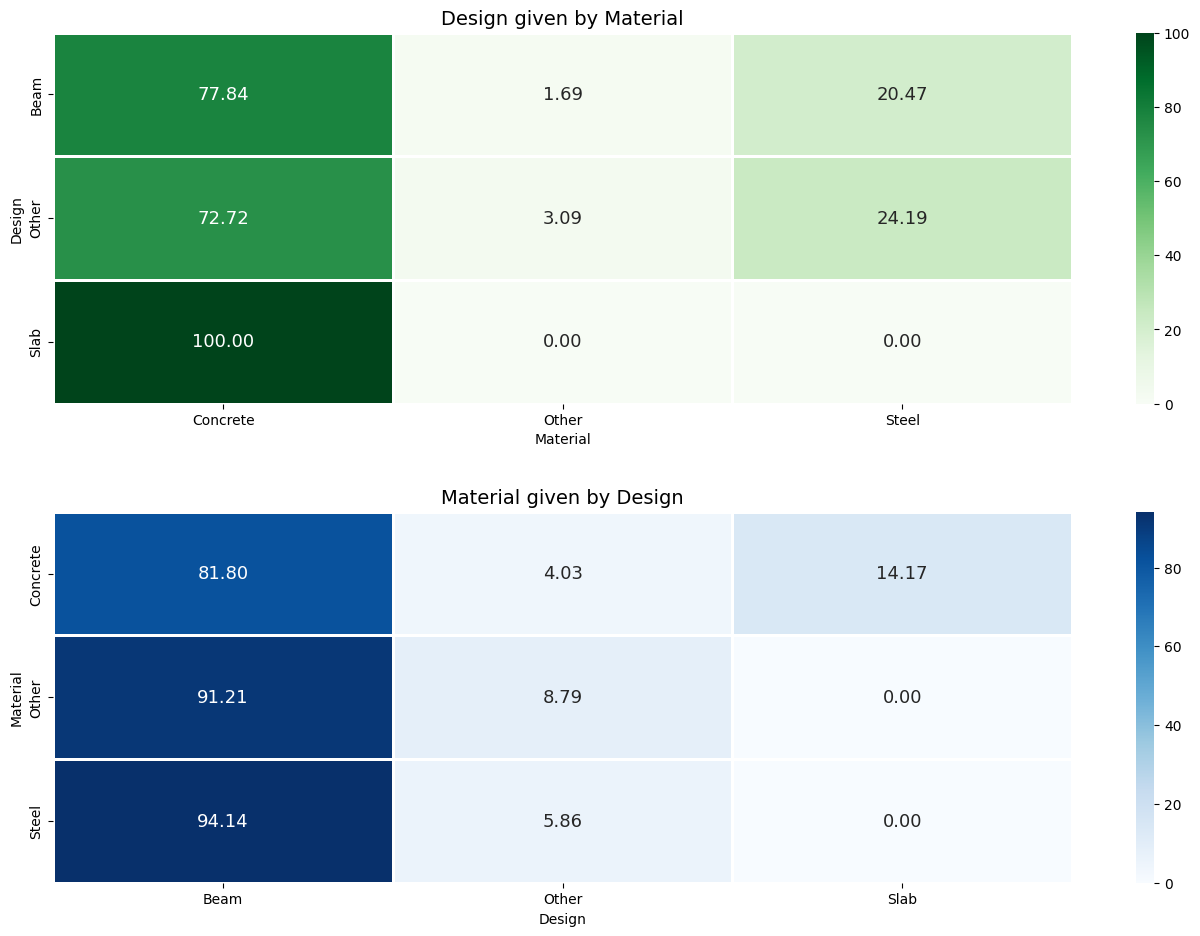

In [13]:
#conditionally probability cross tab, normalise by index
design_given_material = pd.crosstab(bridges.Design, [bridges.Material], normalize='index')
material_given_design = pd.crosstab(bridges.Material, [bridges.Design], normalize='index')

#plot heatmap
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(14,10))

sns.heatmap(design_given_material*100, cmap=sns.color_palette('Greens', as_cmap=True), linewidths=2,
            annot=True, ax=axes[0], annot_kws={'size':13}, fmt='.2f')
sns.heatmap(material_given_design*100, cmap=sns.color_palette('Blues', as_cmap=True), linewidths=2,
            annot=True, ax=axes[1], annot_kws={'size':13}, fmt='.2f');

axes[0].set_title('Design given by Material', fontsize=14)
axes[1].set_title('Material given by Design', fontsize=14)
plt.tight_layout(pad=3.0)

- Design by Material: Concrete is the main choice for Slab (100%) and Beam (77.84%) designs, likely due to its durability and cost-effectiveness. Steel, used in Beam (20.47%) and "Other" (24.19%) designs, may be reserved for structures that need extra strength. This suggests that material choices are carefully matched to design needs, which could affect how different bridges wear over time and require maintenance.

- Material by Design: Concrete is heavily used in Beam (81.8%) and all Slab designs, suggests its preferred for cost and durability, while Steel’s selective use in Beam designs (14.17%) likely reflects its strength for load-bearing needs. This combination might mean that steel Beam bridges experience different wear patterns, needing specific maintenance approaches compared to concrete structures.

These patterns indicate that material and design combinations influence durability and overall bridge condition, with concrete structures possibly wearing faster than steel-based ones.

### 3.3 Continuous and Categorical Predictors

This section uses KDE plots to examine how continuous predictors (AverageDaily, Age, and Trucks_percent) vary across categories (Material and Design), providing smooth visualisations of data distributions which makes it easier to detect patterns across categories. Applying Log transformations to skewed data enhances the comparison, helping us understand factors that may influence bridge wear and durability.

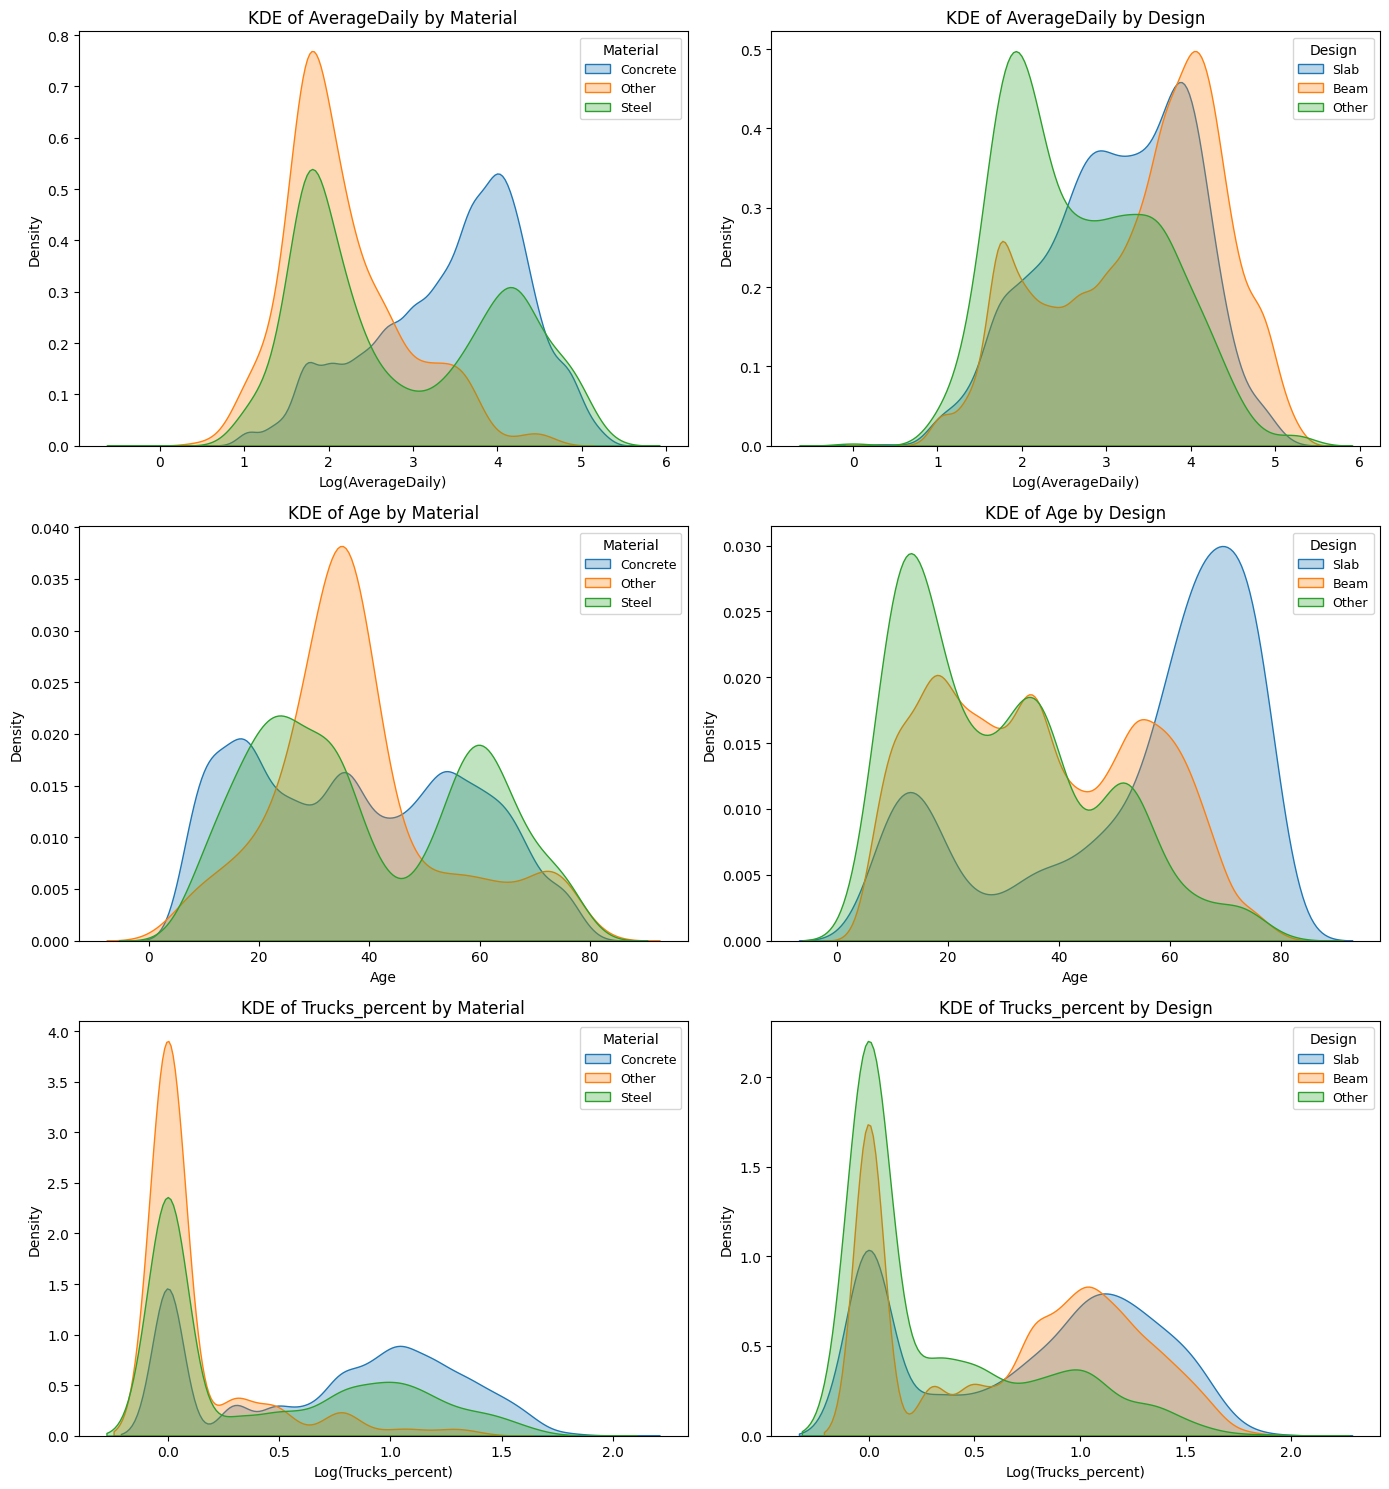

In [14]:
# Lists of continuous and categorical predictors
continuous_predictors = ['AverageDaily', 'Age', 'Trucks_percent']
categorical_predictors = ['Material', 'Design']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))
axes = axes.flatten()

# Track the subplot index
plot_index = 0

# Loosp over each continuous variable
for cont_var in continuous_predictors:

    # Loops over each categorical variable
    for cat_var in categorical_predictors:

        # Accesses the current subplot
        ax = axes[plot_index]

        # Gets unique categories for the categorical variable
        categories = bridges[cat_var].unique()

        # Plots each category in the KDE plot
        for category in categories:
            subset = bridges[bridges[cat_var] == category][cont_var]

            # Applys log transformation for skewed data
            data = np.log10(subset + 1) if cont_var in ['AverageDaily', 'Trucks_percent'] else subset

            # Plots the KDE for the category
            sns.kdeplot(data=data, label=category, ax=ax, fill=True, alpha=0.3)

        # Sets titles and labels
        ax.set_title(f"KDE of {cont_var} by {cat_var}", fontsize=12)
        ax.set_xlabel(f'Log({cont_var})' if cont_var in ['AverageDaily', 'Trucks_percent'] else cont_var, fontsize=10)
        ax.set_ylabel("Density", fontsize=10)
        ax.legend(title=cat_var, loc='upper right', fontsize=9)

        # Moves to the next subplot
        plot_index += 1

plt.tight_layout()
plt.show()

Average Daily Traffic:
- Material: Concrete bridges are exposed to a wider range of traffic levels than steel, suggesting they’re used in varied traffic settings, which could impact their durability over time.
- Design: Beam designs are found in higher-traffic areas, likely because they’re built to handle more load, while Slab designs are more common in low-traffic environments.

Age:
- Material: Concrete bridges tend to be middle-aged, while steel bridges are generally newer, which may mean that older concrete structures need more maintenance.
- Design: Slab designs are typically older, potentially explaining their wear patterns, whereas Beam and "Other" designs span a broader age range.

Percentage of Trucks:
- Material: Concrete bridges experience more heavy truck traffic than steel, suggesting that they’re often used in load-bearing settings, which could accelerate wear.
- Design: Beam designs see the highest truck traffic, aligning with their strength for heavier loads, while Slab designs are more often in lighter traffic areas.

These patterns suggest that material and design choices are tailored to traffic and load demands, impacting bridge condition.

### 3.4 Preliminary Conclusions

Based on the exploratory analysis of both continuous and categorical variables against our target variable, some concludions can be made:

- Predictive Potential: Among the variables studied, Age and Truck Percentage show clear relationships with bridge condition. Older bridges and those exposed to higher truck traffic generally show more wear, indicating these variables are valuable for predicting bridge condition.

- Most Influential Variables: Age is the most significant predictor, with a noticeable decline in condition as bridges age. Truck Percentage also plays a role, particularly impacting concrete and Beam designs that endure higher truck loads. Material and Design contribute by showing how certain combinations (e.g. older concrete Slabs) are more prone to wear.

## Section 4: Regression Modelling

This section builds a linear regression model to assess how Average Daily Traffic, Age, Truck Percentage, Material, and Design affect bridge condition.

It involves:

- Recording and interpreting the R² value to asses model accuracy.
- Analysing residuals to evaluate prediction errors.
- Using regression coefficients to compare each predictor’s impact.
- Drawing final conclusions

### 4.1 Linear Regression Model

We prepare and fit a linear regression model by encoding categorical variables to represent numerical values which will allow for using both continuous and categorical predictors to evaluate how well they collectively explain variations in bridge condition.

In [15]:
from sklearn.linear_model import LinearRegression

#encoding categorical variables
Material_d = pd.get_dummies(bridges.Material, dtype = int)
Design_d = pd.get_dummies(bridges.Design, dtype = int)

#define target and predictors (x, y)
y = bridges.Current_Condition
x = np.column_stack((bridges.Age, bridges.Trucks_percent, bridges.AverageDaily,
                     Material_d.Concrete, Material_d.Steel, Material_d.Other,
                     Design_d.Slab, Design_d.Beam, Design_d.Other))

#fit the linear regression modeland resplau the R2 coefficient of determination and intercept
reg = LinearRegression().fit(x, y)
print('The R2 coefficient of determination is %4.3f' % reg.score(x, y))
print('The intercept is %4.1f' % reg.intercept_)

The R2 coefficient of determination is 0.455
The intercept is 21.5


- The R² value of 0.455 tells us that our model explains about 45.5% of the factors affecting bridge condition, meaning it captures some key influences but leaves room for other, unaccounted factors.

- The intercept of 21.5 suggests that without any influence from the predictor variables, a bridge would theoretically start with a condition score of 21.5. This hypothetical scenario gives us a baseline to understand how each factor contributes to overall condition.

This suggests our model is informative but could benefit from including additional factors to capture a bigger picture of bridge condition.

### 4.2 Predictors Impact

We calculate each predictor's overall impact on bridge condition to understand the influence of continuous and categorical variables, helping identify which factors the most significant.

In [16]:
#define coefficients for each predictor variable
beta_Age, beta_Trucks_percent, beta_AverageDaily, beta_Material_Concrete, beta_Material_Steel, \
beta_Material_Other, beta_Design_Slab, beta_Design_Beam, beta_Design_Other = reg.coef_

# Calculate the range (max - min) for each continuous predictor
age_range = bridges['Age'].max() - bridges['Age'].min()
trucks_percent_range = bridges['Trucks_percent'].max() - bridges['Trucks_percent'].min()
average_daily_range = bridges['AverageDaily'].max() - bridges['AverageDaily'].min()

# For dummy variables, the range is effectively 1 because they are binary (0 or 1)
binary_range = 1  # for each dummy variable (Material and Design dummies)

# Display results with adjusted interpretation
print(f"{'Predictor':<30}{'Coefficient':<20}{'Range':<10}{'Impact':<20}")
print("="*72)

# Continuous predictors with their ranges
print(f"{'Age':<30}{beta_Age:<20.4f}{age_range:<10.2f}{(beta_Age * age_range):<20.4f}")
print(f"{'Trucks Percent':<30}{beta_Trucks_percent:<20.4f}{trucks_percent_range:<10.2f}{(beta_Trucks_percent * trucks_percent_range):<20.4f}")
print(f"{'Average Daily':<30}{beta_AverageDaily:<20.4f}{average_daily_range:<10.2f}{(beta_AverageDaily * average_daily_range):<20.4f}")

# Categorical predictors (dummy variables) with a range of 1
print(f"{'Material (Concrete)':<30}{beta_Material_Concrete:<20.4f}{binary_range:<10}{beta_Material_Concrete * binary_range:<20.4f}")
print(f"{'Material (Steel)':<30}{beta_Material_Steel:<20.4f}{binary_range:<10}{beta_Material_Steel * binary_range:<20.4f}")
print(f"{'Material (Other)':<30}{beta_Material_Other:<20.4f}{binary_range:<10}{beta_Material_Other * binary_range:<20.4f}")
print(f"{'Design (Slab)':<30}{beta_Design_Slab:<20.4f}{binary_range:<10}{beta_Design_Slab * binary_range:<20.4f}")
print(f"{'Design (Beam)':<30}{beta_Design_Beam:<20.4f}{binary_range:<10}{beta_Design_Beam * binary_range:<20.4f}")
print(f"{'Design (Other)':<30}{beta_Design_Other:<20.4f}{binary_range:<10}{beta_Design_Other * binary_range:<20.4f}")


Predictor                     Coefficient         Range     Impact              
Age                           -0.0572             75.00     -4.2899             
Trucks Percent                0.0056              99.00     0.5541              
Average Daily                 -0.0000             200000.00 -0.0919             
Material (Concrete)           1.4347              1         1.4347              
Material (Steel)              0.0167              1         0.0167              
Material (Other)              -1.4514             1         -1.4514             
Design (Slab)                 0.0148              1         0.0148              
Design (Beam)                 -0.0229             1         -0.0229             
Design (Other)                0.0081              1         0.0081              


- A one-year increase in Age is associated with a 0.0572 decrease in bridge condition, showing that Age has the largest negative impact overall (-4.29). This indicates that bridge condition declines significantly as bridges age, making it a key predictor.

- Material (Concrete) has the highest positive impact (1.43), suggesting concrete bridges tend to be in better condition. Material (Other) shows a negative impact (-1.45), indicating lower durability for meterials such as Timber or Masonry.

- A 1% increase in Truck Percentage is associated with a 0.0056 increase in bridge condition thus has a mid positive impact (0.55), meaning higher truck traffic contributes slightly to bridge wear but is less influential than age or material.

- Average Daily Traffic and Design variables have minimal impact, indicating they alone do not significantly affect condition.

In summary, Age and Material are the strongest predictors of bridge condition.

### 4.3 Distribution of Residuals (errors)

We examine the model’s accuracy by plotting the distribution of residuals to check for prediction biases.

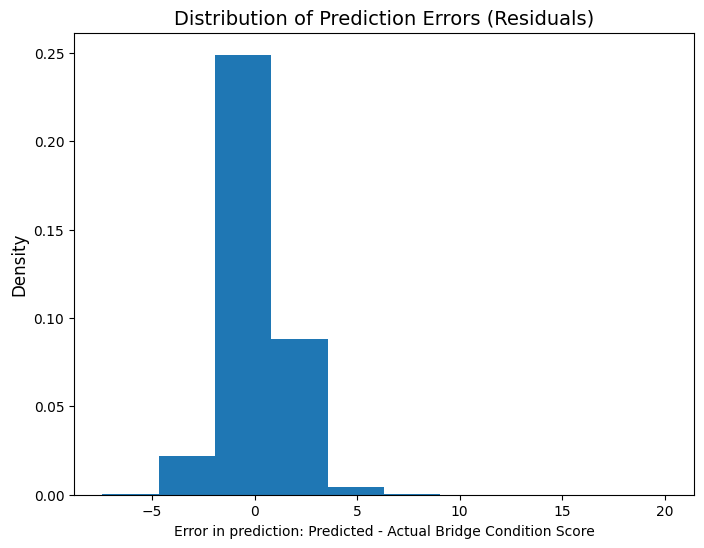

In [17]:
#Predicitng values using the fitted regression model
y_hat = reg.predict(x)

#calculate residuals
residuals = y_hat - y

#plot distribution
fig, a1 = plt.subplots(1, 1, figsize=(8,6))
a1.hist(residuals, bins=10, density=True)
a1.set_xlabel('Error in prediction: Predicted - Actual Bridge Condition Score')
a1.set_ylabel('Density', fontsize=12)
a1.set_title('Distribution of Prediction Errors (Residuals)', fontsize=14)

plt.show()

The distribution of residuals shows that most errors are close to zero, indicating that the model generally predicts bridge condition scores accurately. However, a few outliers suggest the model struggles with certain bridges, potentially due to unaccounted factors impacting their condition.

### 4.4 Model Accuracy

This plot of scatter compares predicted vs. actual bridge condition scores to assess model accuracy, with the blue line representing perfect predictions.

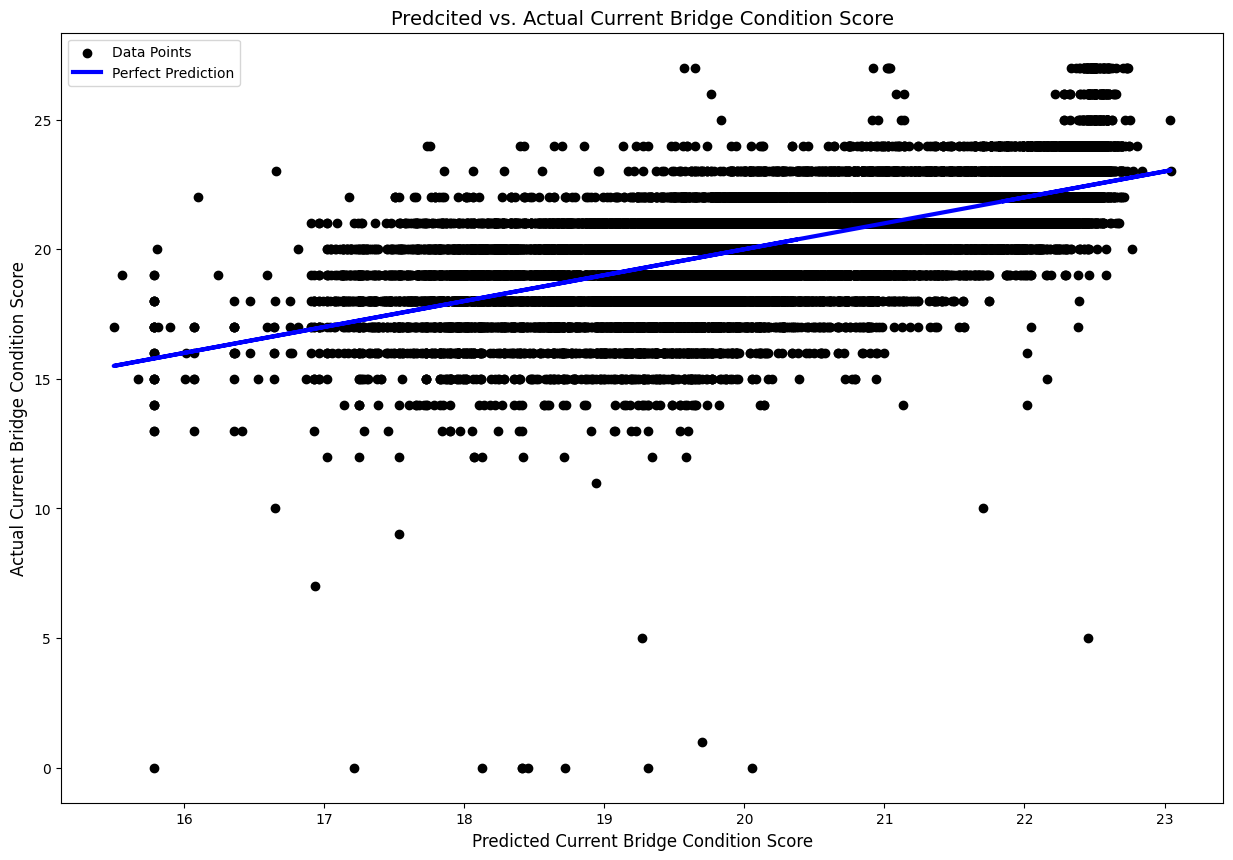

In [18]:
# Plot predicted vs actual values
fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_hat, y,  color='black', label='Data Points')
a.plot(y_hat, y_hat, color='blue', linewidth=3, label='Perfect Prediction')

a.set_xlabel('Predicted Current Bridge Condition Score', fontsize=12)
a.set_ylabel('Actual Current Bridge Condition Score', fontsize=12)
a.set_title('Predcited vs. Actual Current Bridge Condition Score', fontsize=14)
a.legend()

plt.show()

The plot shows that many predictions fall below the actual bridge condition scores, especially for lower values, suggesting the model often underestimates bridge condition. This indicates that there might be other factors affecting bridge condition that the model isn’t fully capturing yet.

### 4.5 Final Conclusions

#### 4.5.1 How well the proposed variables can predict the bridge condition

The model explains a moderate portion of the variance in bridge condition, as reflected by the R² value of 0.455. The distribution of residuals shows that most errors are close to zero yet some outliers exist, and the predicted vs. actual plot shows that many predictions fall near but not always on the perfect prediction line. This overall suggests room for improvement in accuracy of this analysis with the inclusion of additional factors.

#### 4.5.2 Which of the proposed variables has more influence on the current condition

Age and Material are the strongest predictors of bridge condition, with Age showing the largest negative effect indicating significant deterioration over time. Concrete (material) bridges tend to be more durable, while other materials show more wear. Truck Percentage also impacts condition, with higher truck traffic associated with lower condition scores, though to a lesser extent. Average Daily Traffic has minimal impact, as traffic type likely matters more than volume. Design type also shows little impact, though it may influence condition indirectly through material choice. Overall, Age and Material are key, with Truck Percentage contributing moderately, while Average Daily Traffic and Design play minor roles in this model and analysis.

#### 4.5.3 Suggestions for further analysis

- Add New Variables: the use of factors like weather exposure and load capacity could capture additional influences on bridge condition.

- Test Non-Linear Models: exploring non-linear models to capture any non-linear relationships affecting bridge condition.

- Benchmarking against Industry Standards: Compare the results of your analysis with industry standards or condition benchmarks used by other transportation department to validate the model’s accuracy.